In [ ]:
import pandas as pd
import numpy as np
import nltk
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
df=pd.read_csv("Sarcasm_dataset.csv")
df.head(10)

article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   
5  https://www.huffingtonpost.com/entry/advancing...   
6  https://www.huffingtonpost.com/entry/how-meat-...   
7  https://www.huffingtonpost.com/entry/boxed-col...   
8  https://politics.theonion.com/top-snake-handle...   
9  https://www.huffingtonpost.com/entry/fridays-m...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  
5                        advancing the world's women             0  
6     the fascinating case for eating lab-grown meat             0  
7  this ceo will send your kids to school, if you...             0  
8  top snake handler leaves sinking huckabee camp...             1  
9  friday's morning email: inside trump's presser...             0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [ ]:
df.drop('article_link', axis = 1, inplace = True)
df.head()

headline  is_sarcastic
0  former versace store clerk sues over secret 'b...             0
1  the 'roseanne' revival catches up to our thorn...             0
2  mom starting to fear son's web series closest ...             1
3  boehner just wants wife to listen, not come up...             1
4  j.k. rowling wishes snape happy birthday in th...             0

<Axes: xlabel='is_sarcastic', ylabel='count'>

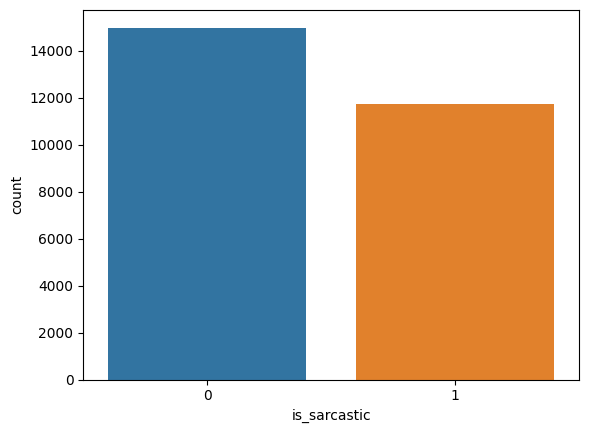

In [ ]:
sns.countplot(x = 'is_sarcastic', data=df )

In [ ]:
df.drop_duplicates(subset=['headline'], inplace = True)
df.duplicated().sum()

0

In [ ]:
import re
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

def cleantext(text):
    text = re.sub(r'\d+', '', text)
    text = "".join([char for char in text if char not in string.punctuation])
    return text

df['headline']=df['headline'].apply(cleantext)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['sentence_len'] = df['headline'].str.len()
df.head()

headline  is_sarcastic  \
0  former versace store clerk sues over secret bl...             0   
1  the roseanne revival catches up to our thorny ...             0   
2  mom starting to fear sons web series closest t...             1   
3  boehner just wants wife to listen not come up ...             1   
4  jk rowling wishes snape happy birthday in the ...             0   

   sentence_len  
0            76  
1            81  
2            78  
3            82  
4            62

In [ ]:
max_features = 10000
maxlen = 300
embed_size = 200

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_features,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(df['headline'])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

In [ ]:
print("Number of Samples:", len(X))
print(X[10])
print("Number of Labels: ", len(y))
print(y[10])

Number of Samples: 26602
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

In [ ]:
vocab_size=len(tokenizer.word_index)
print (vocab_size)

27667


In [ ]:
!wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2023-12-07 17:32:47--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.09MB/s    in 2m 39s  

2023-12-07 17:35:26 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
glove_file="/content/glove.6B.300d.txt"

In [ ]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(glove_file))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
embedding_matrix

array([[-0.61238433, -0.52697307,  0.14553209, ..., -0.27016006,
        -0.18170394,  0.3475125 ],
       [-0.25756001, -0.057132  , -0.67189997, ..., -0.16043   ,
         0.046744  , -0.070621  ],
       [-0.076947  , -0.021211  ,  0.21270999, ...,  0.18351001,
        -0.29183   , -0.046533  ],
       ...,
       [ 0.52385002,  0.19008   ,  0.27915001, ...,  0.58598   ,
         0.36983001, -0.32800001],
       [ 0.14018001, -0.11497   , -0.24729   , ..., -0.22384   ,
         0.28740001, -0.14086001],
       [-0.15857001,  0.074619  ,  0.051203  , ..., -0.25275001,
         0.16893999,  0.074269  ]])

In [ ]:
import tensorflow
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

input_layer = Input(shape=(maxlen,),dtype=tensorflow.int64)
embed = Embedding(embedding_matrix.shape[0],output_dim=300,weights=[embedding_matrix],input_length=maxlen, trainable=True)(input_layer)
lstm=Bidirectional(LSTM(128))(embed)
drop=Dropout(0.3)(lstm)
dense =Dense(100,activation='relu')(drop)
out=Dense(2,activation='softmax')(dense)

In [ ]:
model = Model(input_layer,out)
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 300)          3000000   
                                                                 
 bidirectional (Bidirection  (None, 256)               439296    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 100)               25700     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                             

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [25]:
history = model.fit(X_train,y_train,batch_size=128, validation_data=(X_test, y_test), epochs=3, verbose=1)

Epoch 1/3
167/167 [==============================] - 380s 2s/step - loss: 0.0318 - accuracy: 0.9884 - val_loss: 0.7538 - val_accuracy: 0.8622
Epoch 2/3
167/167 [==============================] - 378s 2s/step - loss: 0.0307 - accuracy: 0.9886 - val_loss: 0.7373 - val_accuracy: 0.8654
Epoch 3/3
167/167 [==============================] - 377s 2s/step - loss: 0.0187 - accuracy: 0.9934 - val_loss: 0.8299 - val_accuracy: 0.8647


In [26]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

666/666 [==============================] - 150s 225ms/step - loss: 0.0096 - accuracy: 0.9967
Accuracy of the model on Training Data is -  99.67106580734253
167/167 [==============================] - 37s 222ms/step - loss: 0.8299 - accuracy: 0.8647
Accuracy of the model on Testing Data is -  86.46870851516724


In [27]:

pred = model.predict(np.array(X_test))
pred[:5]
pred = [1 if j>i else 0 for i,j in pred]

167/167 [==============================] - 37s 221ms/step


In [28]:

cm = confusion_matrix(y_test,pred)
cm

array([[2733,  329],
       [ 391, 1868]])

In [29]:
print(classification_report(y_test, pred, target_names = ['Not Sarcastic','Sarcastic']))

               precision    recall  f1-score   support

Not Sarcastic       0.87      0.89      0.88      3062
    Sarcastic       0.85      0.83      0.84      2259

     accuracy                           0.86      5321
    macro avg       0.86      0.86      0.86      5321
 weighted avg       0.86      0.86      0.86      5321



<Axes: >

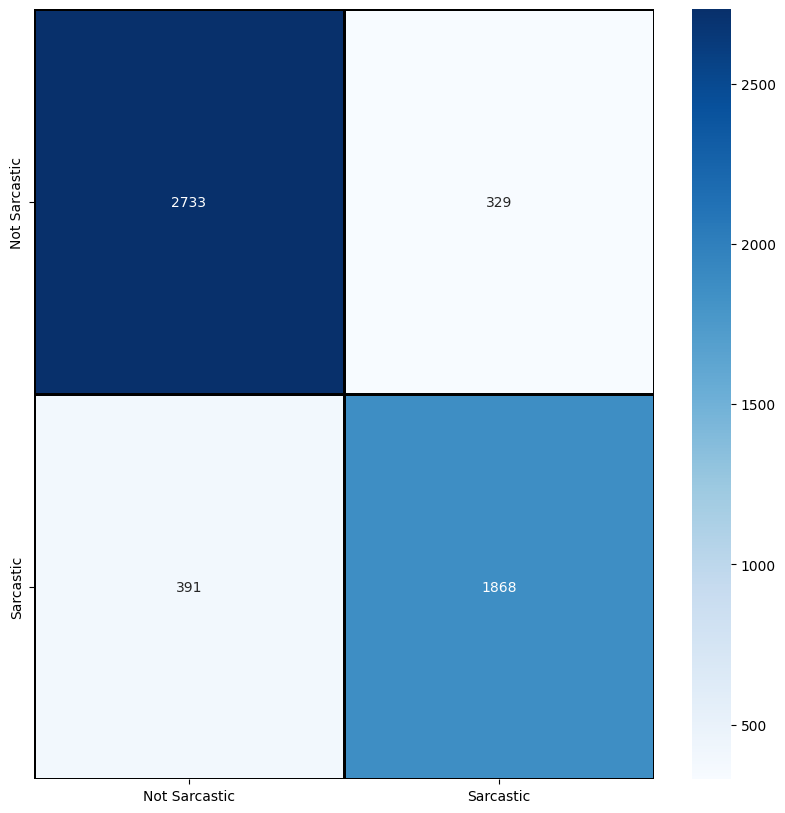

In [30]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])

In [38]:
a = ["Bro took a mission to do noise and air pollution together"]
b=["text me for a guaranteed free coffee"]
seq = tokenizer.texts_to_sequences(a)
seq1= tokenizer.texts_to_sequences(b)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)
padded1 = pad_sequences(seq1, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)
pred1 = model.predict(padded1)

labels = [1,0]
print(pred, labels[np.argmax(pred)])
print(pred1, labels[np.argmax(pred1)])

1/1 [==============================] - 0s 56ms/step
[[9.9999380e-01 6.1761684e-06]] 1
[[0.07086933 0.9291307 ]] 0
